### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [16]:
# data.isna().sum() -> columns with NaN: car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
# data['car'].value_counts(dropna = False)
# data['Bar'].value_counts(dropna = False)
# data['CoffeeHouse'].value_counts(dropna = False)
# data['CarryAway'].value_counts(dropna = False)
# data['RestaurantLessThan20'].value_counts(dropna = False)
data['Restaurant20To50'].value_counts(dropna = False)

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: Restaurant20To50, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [18]:
# data.car = data.car.fillna('do not drive')
# data.Bar = data.Bar.fillna('never')
# data.CoffeeHouse = data.CoffeeHouse.fillna('never')
# data.CarryAway = data.CarryAway.fillna('never')
# data.RestaurantLessThan20 = data.RestaurantLessThan20.fillna('never')
# data.Restaurant20To50 = data.Restaurant20To50.fillna('never')
data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [29]:
data['Y'].value_counts()
num_coupon_accept = data.query("Y == 1").sum()['Y']
total = data.count()['Y']
accept_rate = num_coupon_accept/total
print(accept_rate)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:xlabel='Y', ylabel='Y'>

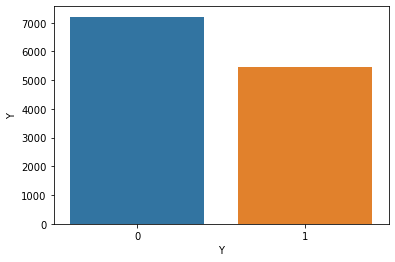

In [31]:
sns.barplot(data=data, x='Y', y=data['Y'].value_counts())

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

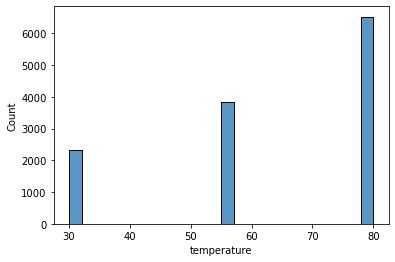

In [32]:
sns.histplot(data=data, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [55]:
bar_data = data.query("coupon == 'Bar'")
bar_data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [56]:
num_bar_coupon_accept = bar_data.query("Y == 1").sum()['Y']
total_bar = bar_data.count()['Y']
bar_accept_rate = num_bar_coupon_accept/total_bar
print(bar_accept_rate) 
# 41%

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [57]:
# bar_data['Bar'].value_counts()

# fewer work
bar_3_or_fewer = bar_data.query("Bar == '1~3' or Bar == 'less1'")
fewer_accept = bar_3_or_fewer.query("Y == 1").sum()['Y']
#print(fewer_accept) - 1538
fewer_accept_rate = fewer_accept / (bar_3_or_fewer.count()['Y'])
print(fewer_accept_rate) 
# - 62% acceptance rate (0.52)

#  more than 3 work
bar_more = bar_data.query("Bar == '4~8' or Bar == 'gt8'")
more_accept = bar_more.query("Y == 1").sum()['Y']
# print(more_accept) - 887
more_accept_rate = more_accept / (bar_more.count()['Y'])
print(more_accept_rate) 
# - 62% (0.77)

0.5274043433298863
0.7688442211055276


<AxesSubplot:xlabel='Y', ylabel='Count'>

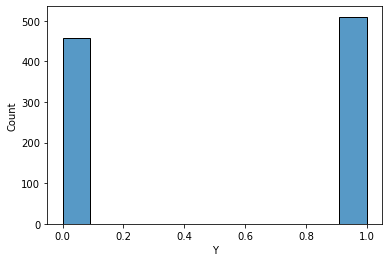

In [97]:
# chart for 3 or fewer
sns.histplot(data=bar_3_or_fewer, x='Y')

<AxesSubplot:xlabel='Y', ylabel='Count'>

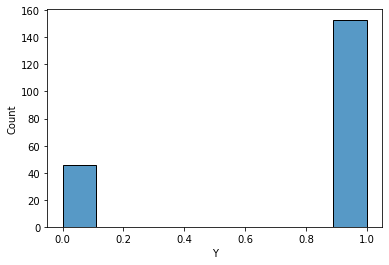

In [98]:
sns.histplot(data=bar_more, x='Y')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [70]:
bar_less_than_1 = bar_data.query("Bar != 'less1' and Bar != 'never'")
#bar_less_than_1.head()

# age 25 and up
bar_less_than_1['age'].value_counts()
age_25_accept = bar_less_than_1.query("age != '21'").sum()['Y']
# print(age_25_accept) - 291 total
age_25_rate = age_25_accept / (bar_less_than_1.count()['Y'])
print(age_25_rate)
# 49%

# the rest
age_21 = bar_less_than_1.query("age == '21'").sum()['Y']
#print(age_21) - 114
age_21_rate = age_21 / (bar_less_than_1.count()['Y'])
print(age_21_rate)
# 19%

0.4966442953020134
0.1912751677852349


<AxesSubplot:xlabel='Y', ylabel='Count'>

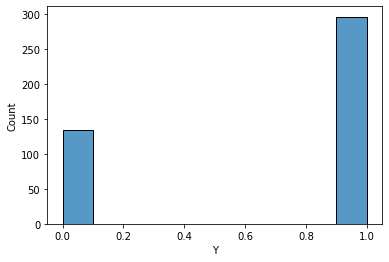

In [105]:
sns.histplot(data=bar_less_than_1.query("age != '21'"), x='Y')

<AxesSubplot:xlabel='Y', ylabel='Count'>

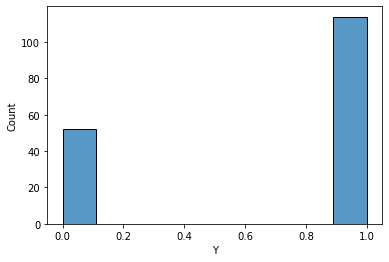

In [106]:
sns.histplot(data=bar_less_than_1.query("age == '21'"), x='Y')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [107]:
# has children

bar_data['has_children'].value_counts()

# those who do not have children (has_children == 0)
no_children = bar_less_than_1.query("has_children == 0")
no_children_accept = no_children.sum()['Y']
no_children_rate = no_children_accept / (no_children.count()['Y'])
# print(no_children_accept) - 565
print(no_children_rate)
# 70%

# those with children (has_children == 1)
children = bar_less_than_1.query("has_children == 1")
children_accept = children.sum()['Y']
# print(children_accept) - 262
children_rate = children_accept / (children.count()['Y'])
print(children_rate)
# 65%

0.7019230769230769
0.6555555555555556


<AxesSubplot:xlabel='Y', ylabel='Count'>

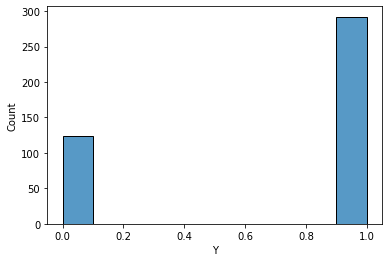

In [108]:
sns.histplot(data=no_children, x='Y')

<AxesSubplot:xlabel='Y', ylabel='Count'>

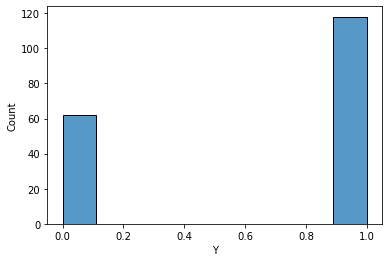

In [109]:
sns.histplot(data=children, x='Y')

In [110]:
# occupation filter for fishing farming or forestry
bar_less_than_1['occupation'].value_counts()

# not farming, fishing or forestry
notFFF = bar_less_than_1.query("occupation != 'Food Preparation & Serving Related' and occupation != 'Life Physical Social Sciences' and occupation != 'Production Occupations'")
notFFF_accept = notFFF.sum()['Y']
notFFF_rate = notFFF_accept / (notFFF.count()['Y'])
print(notFFF_rate)
# 68%

# the rest
FFF = bar_less_than_1.query("occupation == 'Food Preparation & Serving Related' or occupation == 'Life Physical Social Sciences' or occupation == 'Production Occupations'")
FFF_accept = FFF.sum()['Y']
FFF_rate = FFF_accept / (FFF.count()['Y'])
print(FFF_rate)
# 76%

0.6847635726795096
0.76


<AxesSubplot:xlabel='Y', ylabel='Count'>

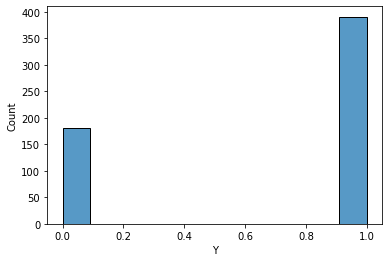

In [111]:
sns.histplot(data=notFFF, x='Y')

<AxesSubplot:xlabel='Y', ylabel='Count'>

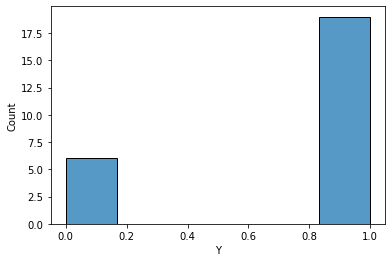

In [112]:
sns.histplot(data=FFF, x='Y')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [113]:
# doing the second one
bar_data['age'].value_counts()

# age under 30
bar_under_30 = bar_less_than_1.query("age == '21' or age == '26'")
under_30_rate = (bar_under_30.sum()['Y']) / (bar_under_30.count()['Y'])
print(under_30_rate)
# 73%

# rest
bar_30 = bar_less_than_1.query("age != '21' and age != '26'")
above_30_rate = (bar_30.sum()['Y']) / (bar_30.count()['Y'])
print(above_30_rate)
# 63%


0.7313432835820896
0.632183908045977


<AxesSubplot:xlabel='Y', ylabel='Count'>

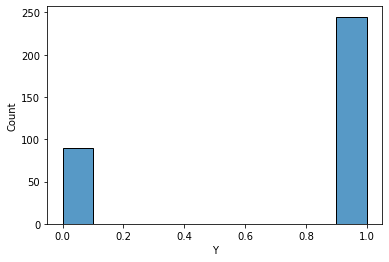

In [114]:
sns.histplot(data=bar_under_30, x='Y')

<AxesSubplot:xlabel='Y', ylabel='Count'>

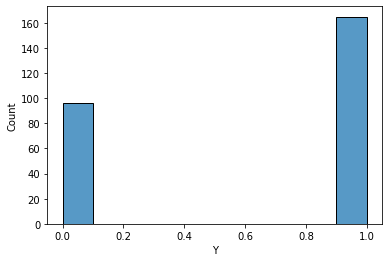

In [115]:
sns.histplot(data=bar_30, x='Y')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [95]:
print("Based on my findings and rates when going through the bar coupons, I have found that those who are around the age of 25-30 and work blue collar jobs would tend to accept the bar coupons more often than the rest.")

Based on my findings and rates when going through the bar coupons, I have found that those who are around the age of 25-30 and work blue collar jobs would tend to accept the bar coupons more often than the rest.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [96]:
coffee = data.query("coupon == 'Coffee House'")
coffee.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0


In [99]:
num_coffee_coupon_accept = coffee.query("Y == 1").sum()['Y']
total_coffee = coffee.count()['Y']
coffee_rate = num_coffee_coupon_accept/total_coffee
print(coffee_rate) 

0.49924924924924924


In [101]:
# fewer work
coffee_3_or_fewer = coffee.query("CoffeeHouse == '1~3' or CoffeeHouse == 'less1' or CoffeeHouse == 'never'")
fewer_accept = coffee_3_or_fewer.query("Y == 1").sum()['Y']
fewer_accept_rate = fewer_accept / (coffee_3_or_fewer.count()['Y'])
print(fewer_accept_rate) 

#  more than 3 work
coffee_more = coffee.query("CoffeeHouse == '4~8' or CoffeeHouse == 'gt8'")
more_accept = coffee_more.query("Y == 1").sum()['Y']
more_accept_rate = more_accept / (coffee_more.count()['Y'])
print(more_accept_rate) 


0.44961489088575096
0.675


<AxesSubplot:xlabel='Y', ylabel='Count'>

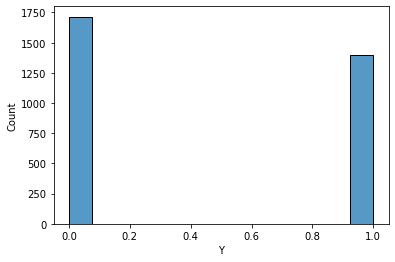

In [117]:
sns.histplot(data=coffee_3_or_fewer, x='Y')

<AxesSubplot:xlabel='Y', ylabel='Count'>

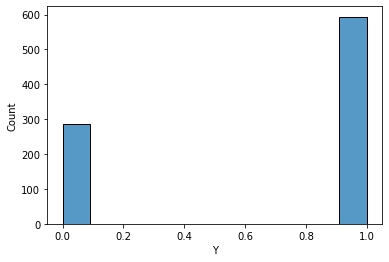

In [118]:
sns.histplot(data=coffee_more, x='Y')

In [119]:
coffee_more_than_1 = coffee.query("CoffeeHouse != 'less1' and CoffeeHouse != 'never'")


# age 25 and up
coffee_more_than_1['age'].value_counts()
age_25_accept = coffee_more_than_1.query("age != '21'").sum()['Y']
# print(age_25_accept) - 291 total
age_25_rate = age_25_accept / (coffee_more_than_1.count()['Y'])
print(age_25_rate)
# 49%

# the rest
age_21 = coffee_more_than_1.query("age == '21'").sum()['Y']
#print(age_21) - 114
age_21_rate = age_21 / (coffee_more_than_1.count()['Y'])
print(age_21_rate)
# 19%

0.49791883454734653
0.16233090530697192


<AxesSubplot:xlabel='Y', ylabel='Count'>

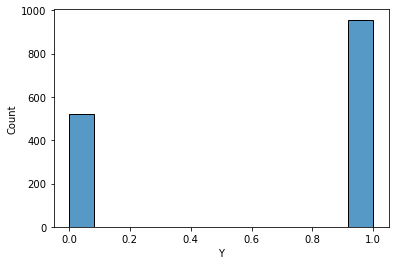

In [120]:
sns.histplot(data=coffee_more_than_1.query("age != '21'"), x='Y')

<AxesSubplot:xlabel='Y', ylabel='Count'>

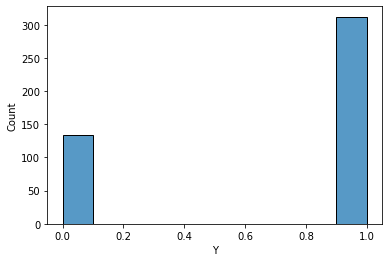

In [121]:
sns.histplot(data=coffee_more_than_1.query("age == '21'"), x='Y')

In [122]:
# those who do not have children (has_children == 0)
no_children = coffee_more_than_1.query("has_children == 0")
no_children_accept = no_children.sum()['Y']
no_children_rate = no_children_accept / (no_children.count()['Y'])
# print(no_children_accept) - 565
print(no_children_rate)
# 70%

# those with children (has_children == 1)
children = coffee_more_than_1.query("has_children == 1")
children_accept = children.sum()['Y']
# print(children_accept) - 262
children_rate = children_accept / (children.count()['Y'])
print(children_rate)

0.671244635193133
0.6433289299867899


<AxesSubplot:xlabel='Y', ylabel='Count'>

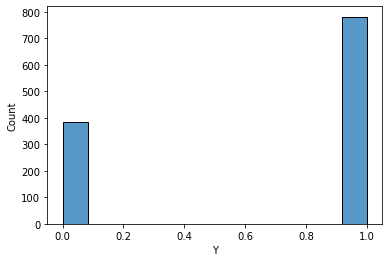

In [123]:
sns.histplot(data=no_children, x='Y')

<AxesSubplot:xlabel='Y', ylabel='Count'>

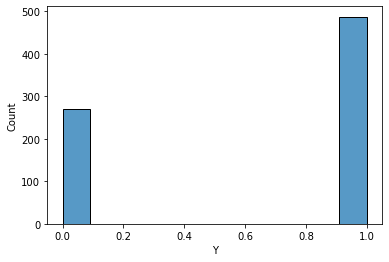

In [124]:
sns.histplot(data=children, x='Y')

In [125]:
# occupation filter for fishing farming or forestry

# not farming, fishing or forestry
notFFF = coffee_more_than_1.query("occupation != 'Food Preparation & Serving Related' and occupation != 'Life Physical Social Sciences' and occupation != 'Production Occupations'")
notFFF_accept = notFFF.sum()['Y']
notFFF_rate = notFFF_accept / (notFFF.count()['Y'])
print(notFFF_rate)
# 68%

# the rest
FFF = coffee_more_than_1.query("occupation == 'Food Preparation & Serving Related' or occupation == 'Life Physical Social Sciences' or occupation == 'Production Occupations'")
FFF_accept = FFF.sum()['Y']
FFF_rate = FFF_accept / (FFF.count()['Y'])
print(FFF_rate)
# 76%

0.657279489904357
0.8


<AxesSubplot:xlabel='Y', ylabel='Count'>

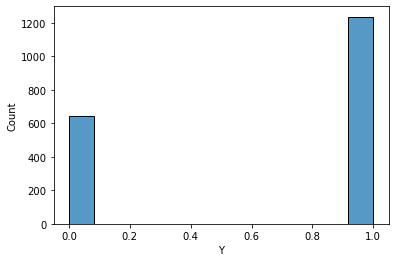

In [126]:
sns.histplot(data=notFFF, x='Y')

<AxesSubplot:xlabel='Y', ylabel='Count'>

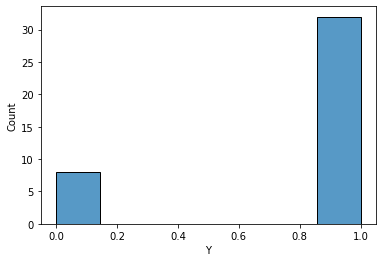

In [127]:
sns.histplot(data=FFF, x='Y')